## Introduction to Plotting

### Python Packages for plotting
- `matplotlib`: All plots in pandas are matplotlib objects
- `seaborn`: Focused on statistical visualization
- `bokeh`: Create interactive visualization for the internet
- `Plotley`: Create interactive and embedded visualization

### Motplotlib
Main submodule is `pyplot` which will give you different functions to work with different plot elements.

#### Creating a Plot
- Import packages
- Import or create data
- Call plotting functions

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
# Display the plots inside the notebook
%matplotlib inline

In [53]:
# Dummy data
x = [1,2,3,4,5]
y = [10,20,30,40,50]

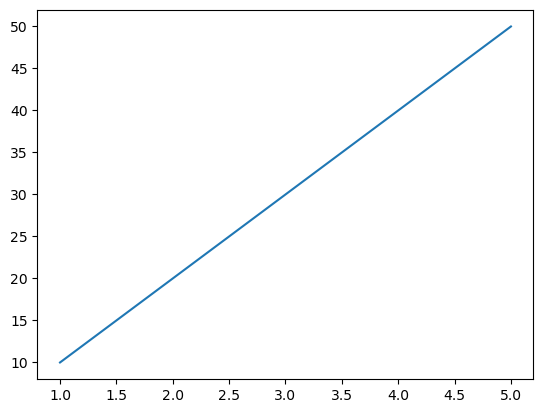

In [54]:
plt.plot(x,y)

#### Test Data
Get data from `icarus.cs.weber.edu/~hvalle/cs4580/data/plottingDemo01.zip`

In [55]:
# Load data
hw_df = pd.read_csv('../data/plottingDemo01/hw.csv')
hw_df.head()

,Index,"Height(Inches)""","""Weight(Pounds)"""
0,1,65.78,112.99
1,2,71.52,136.49
2,3,69.40,153.03
3,4,68.22,142.34
4,5,67.79,144.30


<Axes: >

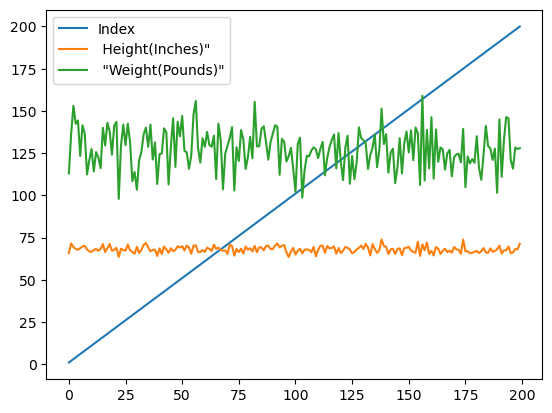

In [56]:
# Sample plot
hw_df.plot()

<Axes: >

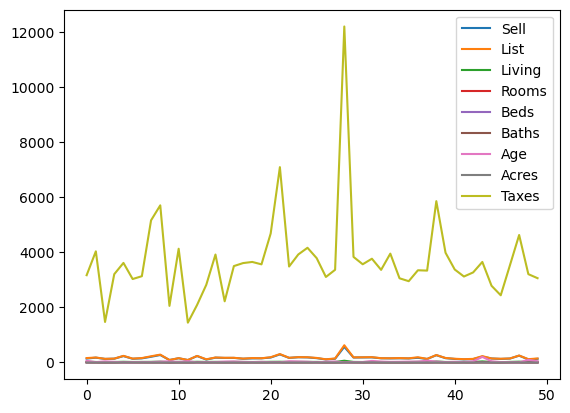

In [57]:
homes_df = pd.read_csv('../data/plottingDemo01/homes.csv')
homes_df.plot()

<Axes: xlabel='List'>

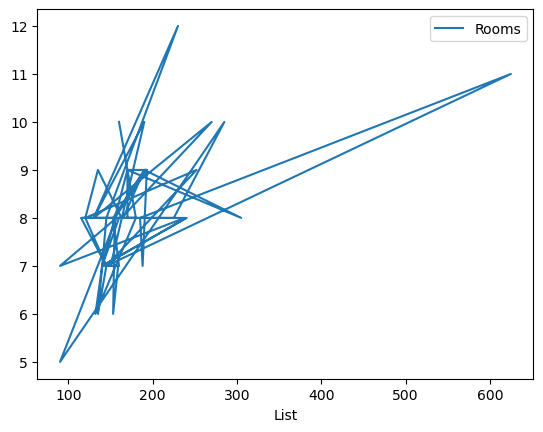

In [58]:
# Specify x and y axis labels
homes_df.plot(x='List',y='Rooms')

<Axes: xlabel='List'>

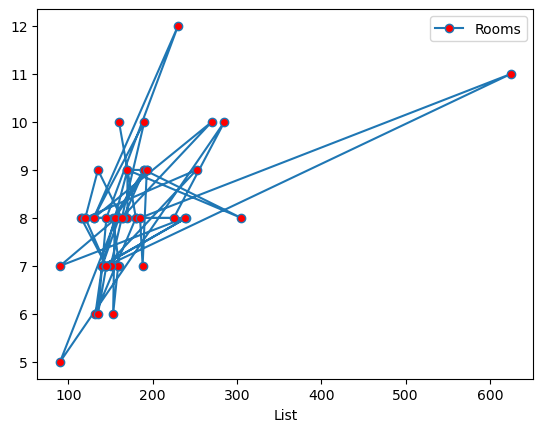

In [59]:
# Add markers
homes_df.plot(x='List',y='Rooms', marker='o',markerfacecolor='r')

### Bar Plot
Useful when you are showing or comparing segments of information or categorical data

In [60]:
cities_df = pd.read_csv('../data/plottingDemo01/cities.csv')
cities_df.head()

,City,Year,Population
0,Charlotte,2015,825668
1,Charlotte,2016,843117
2,Charlotte,2017,860002
3,Charlotte,2018,872514
4,Charlotte,2019,885708


In [61]:
# Filter records from Year=2019
cities_2019df=cities_df[cities_df.Year == 2019]
cities_2019df.head()

,City,Year,Population
4,Charlotte,2019,885708
9,San Francisco,2019,881549
14,Indianapolis,2019,876384
19,Seattle,2019,753675
24,Denver,2019,727211


<Axes: title={'center': 'Population of Cities in 2019'}, xlabel='City'>

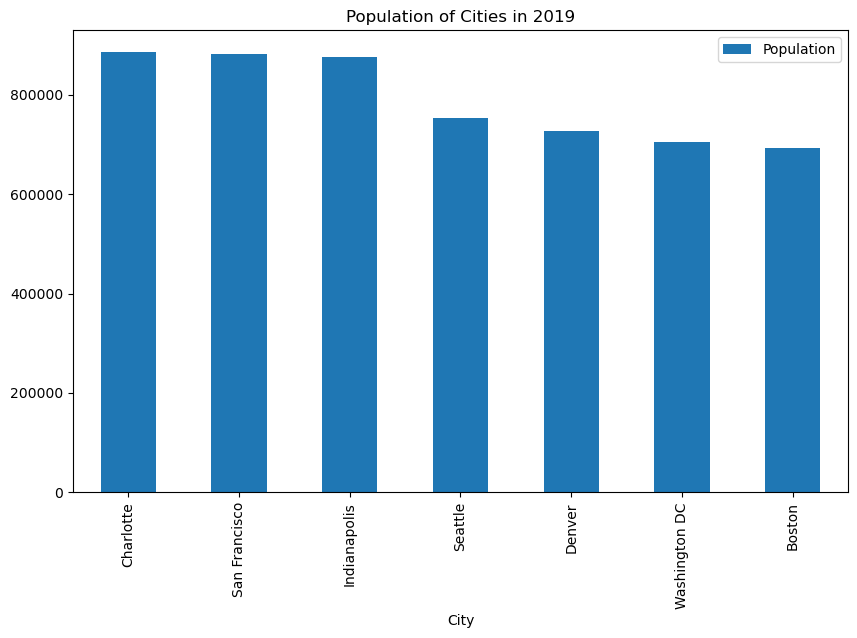

In [62]:
# Now plot a bar chart of number of cities in each region
cities_2019df.plot(kind='bar',x='City',y='Population',title='Population of Cities in 2019',figsize=(10,6))

<Axes: title={'center': 'Population of Cities in 2019'}, ylabel='City'>

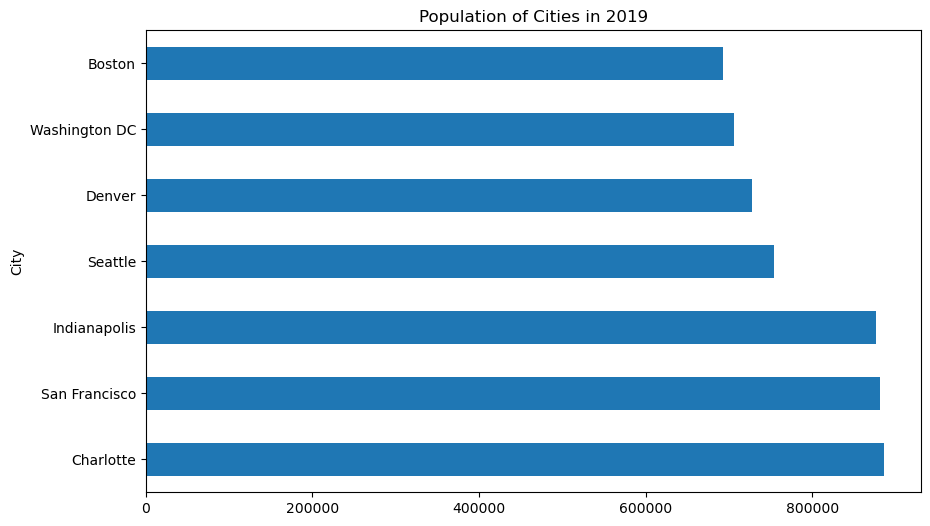

In [63]:
# You may want to plot data horizontally
# Since we are only plotting one set of values, we do not need a legend
cities_2019df.plot(kind='barh',x='City',y='Population',title='Population of Cities in 2019',legend=False,figsize=(10,6))

### Scattere Plots
When you are interested in the relationship between two variables, scatter plots are probably the best choice

In [65]:
# Load data
homes_df.head()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


<Axes: xlabel='List', ylabel='Rooms'>

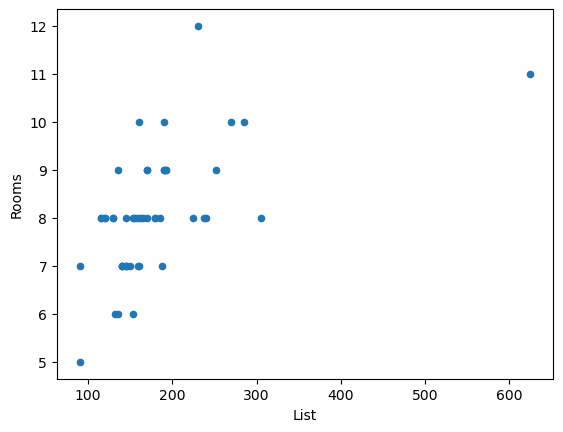

In [70]:
# Plot the scatter plot
homes_df.plot(kind='scatter',x='List',y='Rooms')

<Axes: xlabel='Age', ylabel='List'>

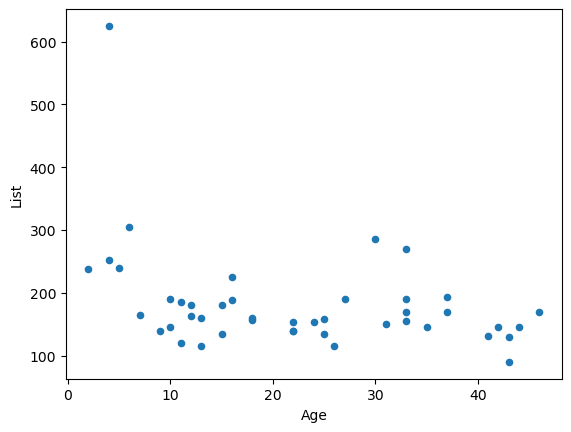

In [75]:
# Filter data directly
homes_df[homes_df['Age'] < 50].plot(kind='scatter',x='Age',y='List')

<Axes: xlabel='Age', ylabel='List'>

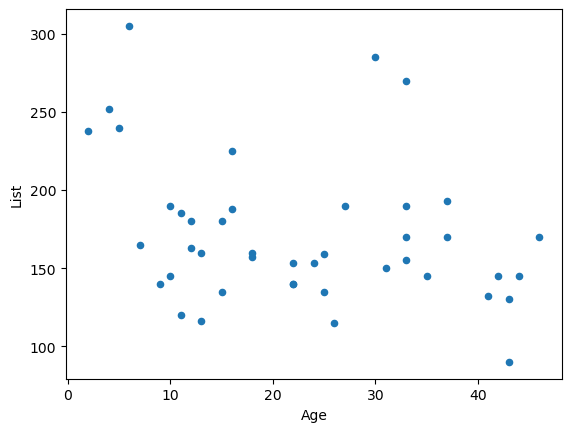

In [83]:
# If you want to eliminate outliers, you can filter the data before plotting
house_plot_df = homes_df[homes_df['Age'] < 50]
house_plot_df = house_plot_df[house_plot_df['List'] < (house_plot_df['List'].mean()+(house_plot_df['List'].std()*2))]
house_plot_df = house_plot_df[house_plot_df['List'] > (house_plot_df['List'].mean()-(house_plot_df['List'].std()*2))]
house_plot_df.plot(kind='scatter',x='Age',y='List')

### Histograms
Use to represent frequency in data

In [85]:
house_plot_df.head()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613
5,135,140,18,7,4,3,9,0.57,3028


<Axes: title={'center': 'Acre Distribution for homes < 50 and no list outliers'}, ylabel='Frequency'>

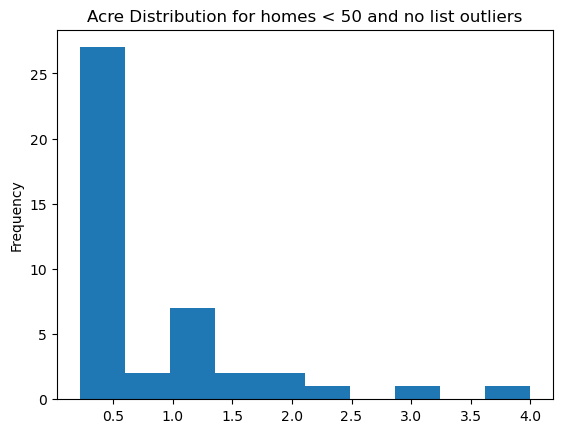

In [89]:
# If you want to know distribution of acreage of the houses
# sold in the filtered dataset, use a histogram
house_plot_df['Acres'].plot(kind='hist',title='Acre Distribution for homes < 50 and no list outliers')

### Area Plot
Useful when you want to understand how values develop and are composed over time

In [91]:
## Load dataset
enrollments_df = pd.read_csv('../data/plottingDemo01/enrollment.csv')
enrollments_df.head()

,Year,Class,Enrollment
0,2018,Freshman,1500
1,2018,Sophomore,1400
2,2018,Junior,1300
3,2018,Senior,1200
4,2019,Freshman,1600


<Axes: xlabel='Year'>

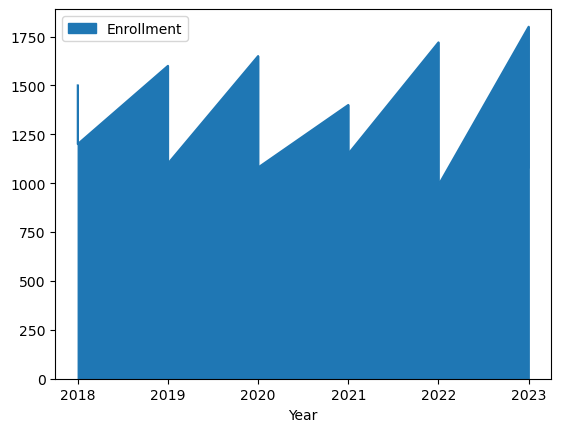

In [94]:
# Create an area plot of the enrollments
enrollments_df.plot(kind='area',x='Year')

In [104]:
# Data is not good because it is not organized by year
# We want to see the total, and how it changes over time
# Sort the data by year, then plot it using the pivot method in pandas
pivot_df = enrollments_df.pivot(index='Year',columns='Class',values='Enrollment')
pivot_df.head()

Class,Freshman,Junior,Senior,Sophomore
Year,,,,
2018,1500,1300,1200,1400
2019,1600,1200,1100,1500
2020,1650,1100,1080,1320
2021,1400,1100,1150,1390
2022,1720,1080,990,1300


<Axes: xlabel='Year'>

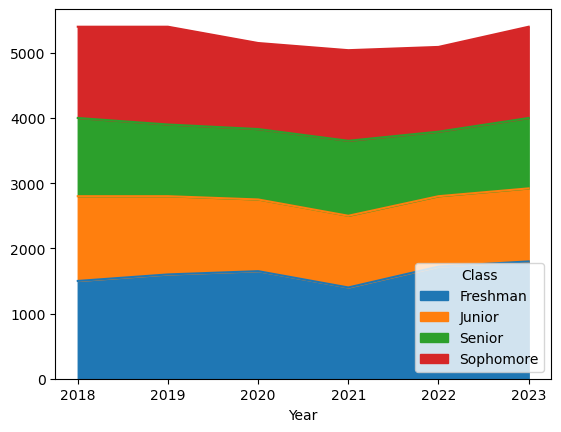

In [106]:
pivot_df.plot(kind='area')

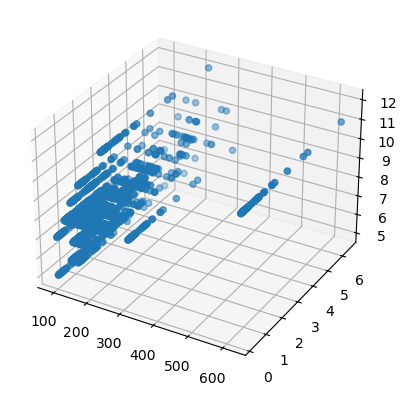

In [119]:
list_values = homes_df['List'].values
acres_values = homes_df['Acres'].values
rooms_values = homes_df['Rooms'].values

# Create meshgrid
X, Y = np.meshgrid(list_values, acres_values)

# Reshape Z to be 2-dimensional
Z = np.tile(rooms_values, (len(acres_values), 1))

# Plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X, Y, Z)
plt.show()